10 year rick of coronary heart disease prediction

In [164]:
import numpy as np 
import pandas as pd
import sklearn      
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report ,accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [165]:
df=pd.read_csv("datasets.csv")
df.drop(["education"],axis=1,inplace=True)
df.info(),df.describe()
df.head(),df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   currentSmoker    4240 non-null   int64  
 3   cigsPerDay       4211 non-null   float64
 4   BPMeds           4187 non-null   float64
 5   prevalentStroke  4240 non-null   int64  
 6   prevalentHyp     4240 non-null   int64  
 7   diabetes         4240 non-null   int64  
 8   totChol          4190 non-null   float64
 9   sysBP            4240 non-null   float64
 10  diaBP            4240 non-null   float64
 11  BMI              4221 non-null   float64
 12  heartRate        4239 non-null   float64
 13  glucose          3852 non-null   float64
 14  TenYearCHD       4240 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 497.0 KB


(   male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
 0     1   39              0         0.0     0.0                0   
 1     0   46              0         0.0     0.0                0   
 2     1   48              1        20.0     0.0                0   
 3     0   61              1        30.0     0.0                0   
 4     0   46              1        23.0     0.0                0   
 
    prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
 0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
 1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
 2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
 3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
 4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   
 
    TenYearCHD  
 0           0  
 1           0  
 2           0  
 3           1  
 4           0  ,

In [166]:
df.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [167]:
col_have_null=["cigsPerDay","BPMeds","totChol","BMI","glucose","heartRate"]
col_have_null

['cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'glucose', 'heartRate']

In [168]:
si = SimpleImputer(strategy="median")   # ✅ This works


for col in col_have_null:
    df[col]=si.fit_transform(df[[col]])

df[col_have_null] = ss.fit_transform(df[col_have_null])
also do with this and also with fillna

In [169]:
df.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [170]:
df["TenYearCHD"].value_counts()

TenYearCHD
0    3596
1     644
Name: count, dtype: int64

In [171]:
from sklearn.utils import resample

df_maj=df[df["TenYearCHD"]==0]
df_min=df[df["TenYearCHD"]==1]


df_min_up= resample(df_min,
                    replace=True,
                    n_samples=len(df_maj),
                    random_state=42)

df_balanced=pd.concat([df_maj,df_min_up])

In [172]:
df_balanced["TenYearCHD"].value_counts()

TenYearCHD
0    3596
1    3596
Name: count, dtype: int64

make them balance....by SMOTE

In [173]:
x=df_balanced.drop(["TenYearCHD"],axis=1)
y=df_balanced["TenYearCHD"]
#split train test
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape

((5753, 14), (1439, 14))

Scaling

In [174]:
ss=StandardScaler()

x_train_scale=ss.fit_transform(x_train)
x_test_scale=ss.transform(x_test)



train by RANDOM FOREST

In [175]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
rfc.fit(x_train_scale,y_train)
y_pred=rfc.predict(x_test_scale)

accuracy confusion matrix 

In [176]:
accuracy_score(y_test,y_pred)

0.970813064628214

In [177]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[698,  37],
       [  5, 699]])

In [178]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.99      0.95      0.97       735\n           1       0.95      0.99      0.97       704\n\n    accuracy                           0.97      1439\n   macro avg       0.97      0.97      0.97      1439\nweighted avg       0.97      0.97      0.97      1439\n'

match prediction of 1 index

In [179]:
print("Predicted Output:",rfc.predict(x_test_scale[1].reshape(1,-1))[0])
print("Actual output:", y_test.iloc[1])

Predicted Output: 1
Actual output: 1


Visualization of Confusion Matrix

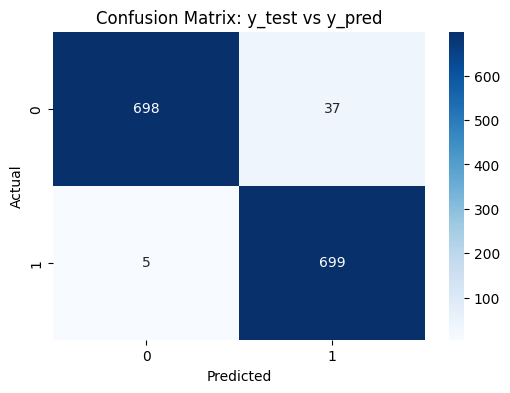

In [183]:
import matplotlib.pyplot as plt
import seaborn as sns



# Plotting heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: y_test vs y_pred')
plt.show()



Save model and Scaler

In [184]:
import pickle

pickle.dump(rfc,open("Heart disease Prediction.pkl","wb"))
pickle.dump(ss,open("Scaler.pkl","wb"))